In [9]:
%pylab inline
import torch
from torch.nn.parameter import Parameter

Populating the interactive namespace from numpy and matplotlib


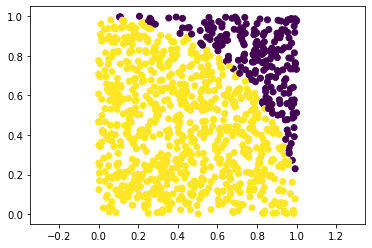

In [14]:
x = torch.rand([1000, 2])
x_in_circle = (x**2).sum(1) < 1

def accuracy(pred_y):
    return (pred_y == x_in_circle).float().mean()

def show(y):
    scatter(*x.numpy().T, c=y.numpy())
    axis('equal')

def loss(p_y):
    return -(x_in_circle.float()*(p_y+1e-10).log() + (1 - x_in_circle.float())*(1-p_y+1e-10).log()).mean()

show(x_in_circle)

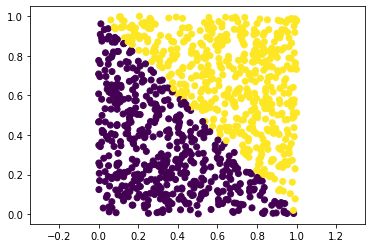

In [17]:
class Linear(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.w = Parameter(torch.ones(input_dim))
        self.b = Parameter(-torch.ones(1))
        
    def forward(self, x):
        return (x*self.w[None,:]).sum(1) + self.b
    
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = Linear(input_dim)
        
    def forward(self, x):
        logit = self.linear(x)
        return 1 / (1 + (-logit).exp())
    
classifier = LinearClassifier(2)
show(classifier(x).detach() > 0.5)

In [20]:
list(classifier.parameters())

[Parameter containing:
 tensor([1., 1.], requires_grad=True),
 Parameter containing:
 tensor([-1.], requires_grad=True)]